# LUNG CANCER PREDICTION PROJECT
by: JEAN-PIERRE GNIMATIN (www.linkedin.com/in/jean-pierre-gnimatin)




This project is dedicated to predicting the likelihood of an individual developing lung cancer by analyzing key factors that contribute to the risk. The dataset consists of 284 instances, each containing 16 attributes that provide valuable information on various aspects related to lung cancer risk.


The primary goal of this project is to develop an effective lung cancer prediction system using advanced machine learning techniques. By leveraging the dataset's attributes, which encompass factors such as gender, age, smoking habits, and other health-related indicators, we aim to build ML models capable of accurately classifying individuals into those with a higher or lower risk of developing lung cancer.


 We will employ five (05) classification techniques, and their performances will be assessed using essential evaluation metrics such as Accuracy, Precision, Recall, and F1-score.

The dataset utilized in this project is openly accessible on Kaggle: 'https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer





### Dataset Characteristics

The dataset comprises 284 instances with a total of 16 attributes. Each instance provides information about various factors that may contribute to lung cancer risk. The attributes and their possible values are as follows:

1. **Gender:** M (male), F (female)
2. **Age:** Age of the patient
3. **Smoking:** YES (2), NO (1)
4. **Yellow Fingers:** YES (2), NO (1)
5. **Anxiety:** YES (2), NO (1)
6. **Peer Pressure:** YES (2), NO (1)
7. **Chronic Disease:** YES (2), NO (1)
8. **Fatigue:** YES (2), NO (1)
9. **Allergy:** YES (2), NO (1)
10. **Wheezing:** YES (2), NO (1)
11. **Alcohol:** YES (2), NO (1)
12. **Coughing:** YES (2), NO (1)
13. **Shortness of Breath:** YES (2), NO (1)
14. **Swallowing Difficulty:** YES (2), NO (1)
15. **Chest Pain:** YES (2), NO (1)
16. **Lung Cancer:** YES, NO

## Project Plan:

### 1. Dataset Characteristics and Pre-process

In this initial stage, we will explore the features included in the dataset, checking for missing values and duplicates. We will also handle missing data to ensure data quality.

### 2. Exploratory Data Analysis (EDA)

Conducting a thorough exploratory data analysis to gain insights into the dataset's characteristics. This involves visualizing and summarizing key statistics to better understand the distribution and relationships among features.

### 3. Feature Engineering

Enhance the dataset by implementing feature engineering techniques. This step involves transforming, creating, or selecting features that can contribute to the predictive accuracy of the lung cancer prediction model.

### 4. Prediction (Classification Techniques)

Apply various classification techniques, including Logistic Regression (LoR), Support Vector Machine (SVM), Random Forest (RF), Decision Tree, and XGBoost, to predict the occurrence of lung cancer based on the refined dataset. Evaluate the performance of each model using crucial metrics such as Accuracy, Precision, Recall, and F1-score. This stage will provide a comprehensive assessment of the models' effectiveness in predicting lung cancer.


### Importing libraries

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns


### Importing dataset

In [3]:
#Importing the dataset
data = pd.read_csv("data.csv")

#Head
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# 1. Dataset charateristics and Pre-process

In [3]:
print("data shape", data.shape)

print("-----------------------------------------")

print("data info", data.info())

print("-----------------------------------------")

print("Dataset description", data.describe())

data shape (309, 16)
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN 

In [9]:
# Check missing values in the features included in the dataset
print("Missing values", data.isnull().sum())

print("-----------------------------------------")

#Check for duplicates
print (" Duplicates", data.duplicated().sum())

Missing values GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
-----------------------------------------
 Duplicates 33


In [4]:
# Delete duplicates form the dataset

data.drop_duplicates(inplace=True)


# Verification check for duplicates
print (" Duplicates", data.duplicated().sum())

 Duplicates 0


In [5]:
# Updated dataset shape
data.shape

(276, 16)

## **Initial Dataset Information:**

The original dataset initially consisted of 309 rows and 16 columns or features. Noteworthy was the identification of 33 duplicate entries within the dataset. Post the removal of duplicates, the dataset now exhibits a revised shape of (276, 16). It's important to highlight that no missing values were identified in this dataset.

In addition, as an integral part of our data preprocessing strategy, we will ensure that data types are appropriately encoded before delving into Exploratory Data Analysis (EDA) and initiating model predictions.

#  2. Exploratory Data Analysis (EDA)

Here we will first do the EDA using ydata-profiling (Authomated method), then we will do the EDA with cliassical methods

In [11]:
# Changing data types for EDA (replace 1 by NO and 2 by YES)
# We will run the EDA with the dataset df
df=data


df['SMOKING'].replace({1:"NO", 2: "YES"}, inplace=True)
df['YELLOW_FINGERS'].replace({1:"NO", 2: "YES"}, inplace=True)
df['ANXIETY'].replace({1:"NO", 2: "YES"}, inplace=True)
df['PEER_PRESSURE'].replace({1:"NO", 2: "YES"}, inplace=True)
df['CHRONIC DISEASE'].replace({1:"NO", 2: "YES"}, inplace=True)
df['FATIGUE '].replace({1:"NO", 2: "YES"}, inplace=True)
df['ALLERGY '].replace({1:"NO", 2: "YES"}, inplace=True)
df['COUGHING'].replace({1:"NO", 2: "YES"}, inplace=True)
df['WHEEZING'].replace({1:"NO", 2: "YES"}, inplace=True)
df['ALCOHOL CONSUMING'].replace({1:"NO", 2: "YES"}, inplace=True)
df['SHORTNESS OF BREATH'].replace({1:"NO", 2: "YES"}, inplace=True)
df['SWALLOWING DIFFICULTY'].replace({1:"NO", 2: "YES"}, inplace=True)
df['CHEST PAIN'].replace({1:"NO", 2: "YES"}, inplace=True)
df['LUNG_CANCER'].replace({1:"NO", 2: "YES"}, inplace=True)


In [12]:
# Show headof updated dataset
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO



 **To be more efficient, we will use ydata-profiling to get the EDA report profile with a few lines** (Automatized method)

In [13]:
#pip Install ydata-profiling 
 ## pip install ydata-profiling

from ydata_profiling import ProfileReport
ProfileReport(df, title="Stroke data EDA Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###  **Classical EDA Method** 

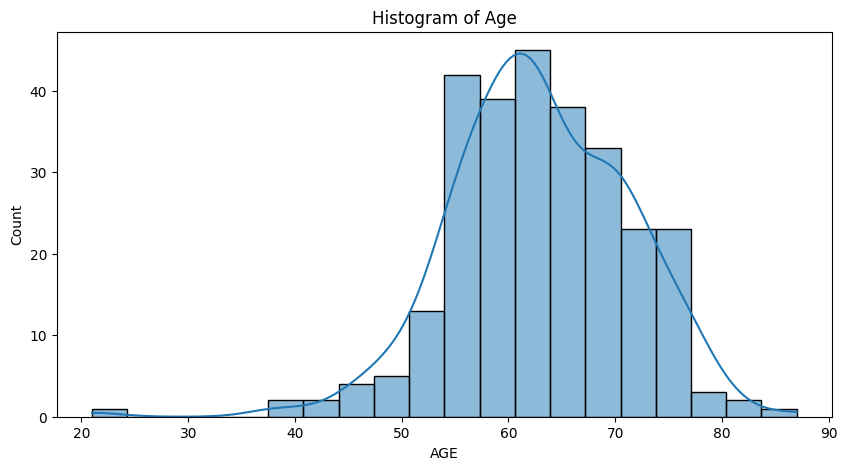

In [25]:
# Univariate analysis of Continuous feature AGE

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Plot histogram for Age
sns.histplot(df['AGE'], kde=True, ax=axes)
axes.set_title('Histogram of Age')

# Show the plot
plt.show()


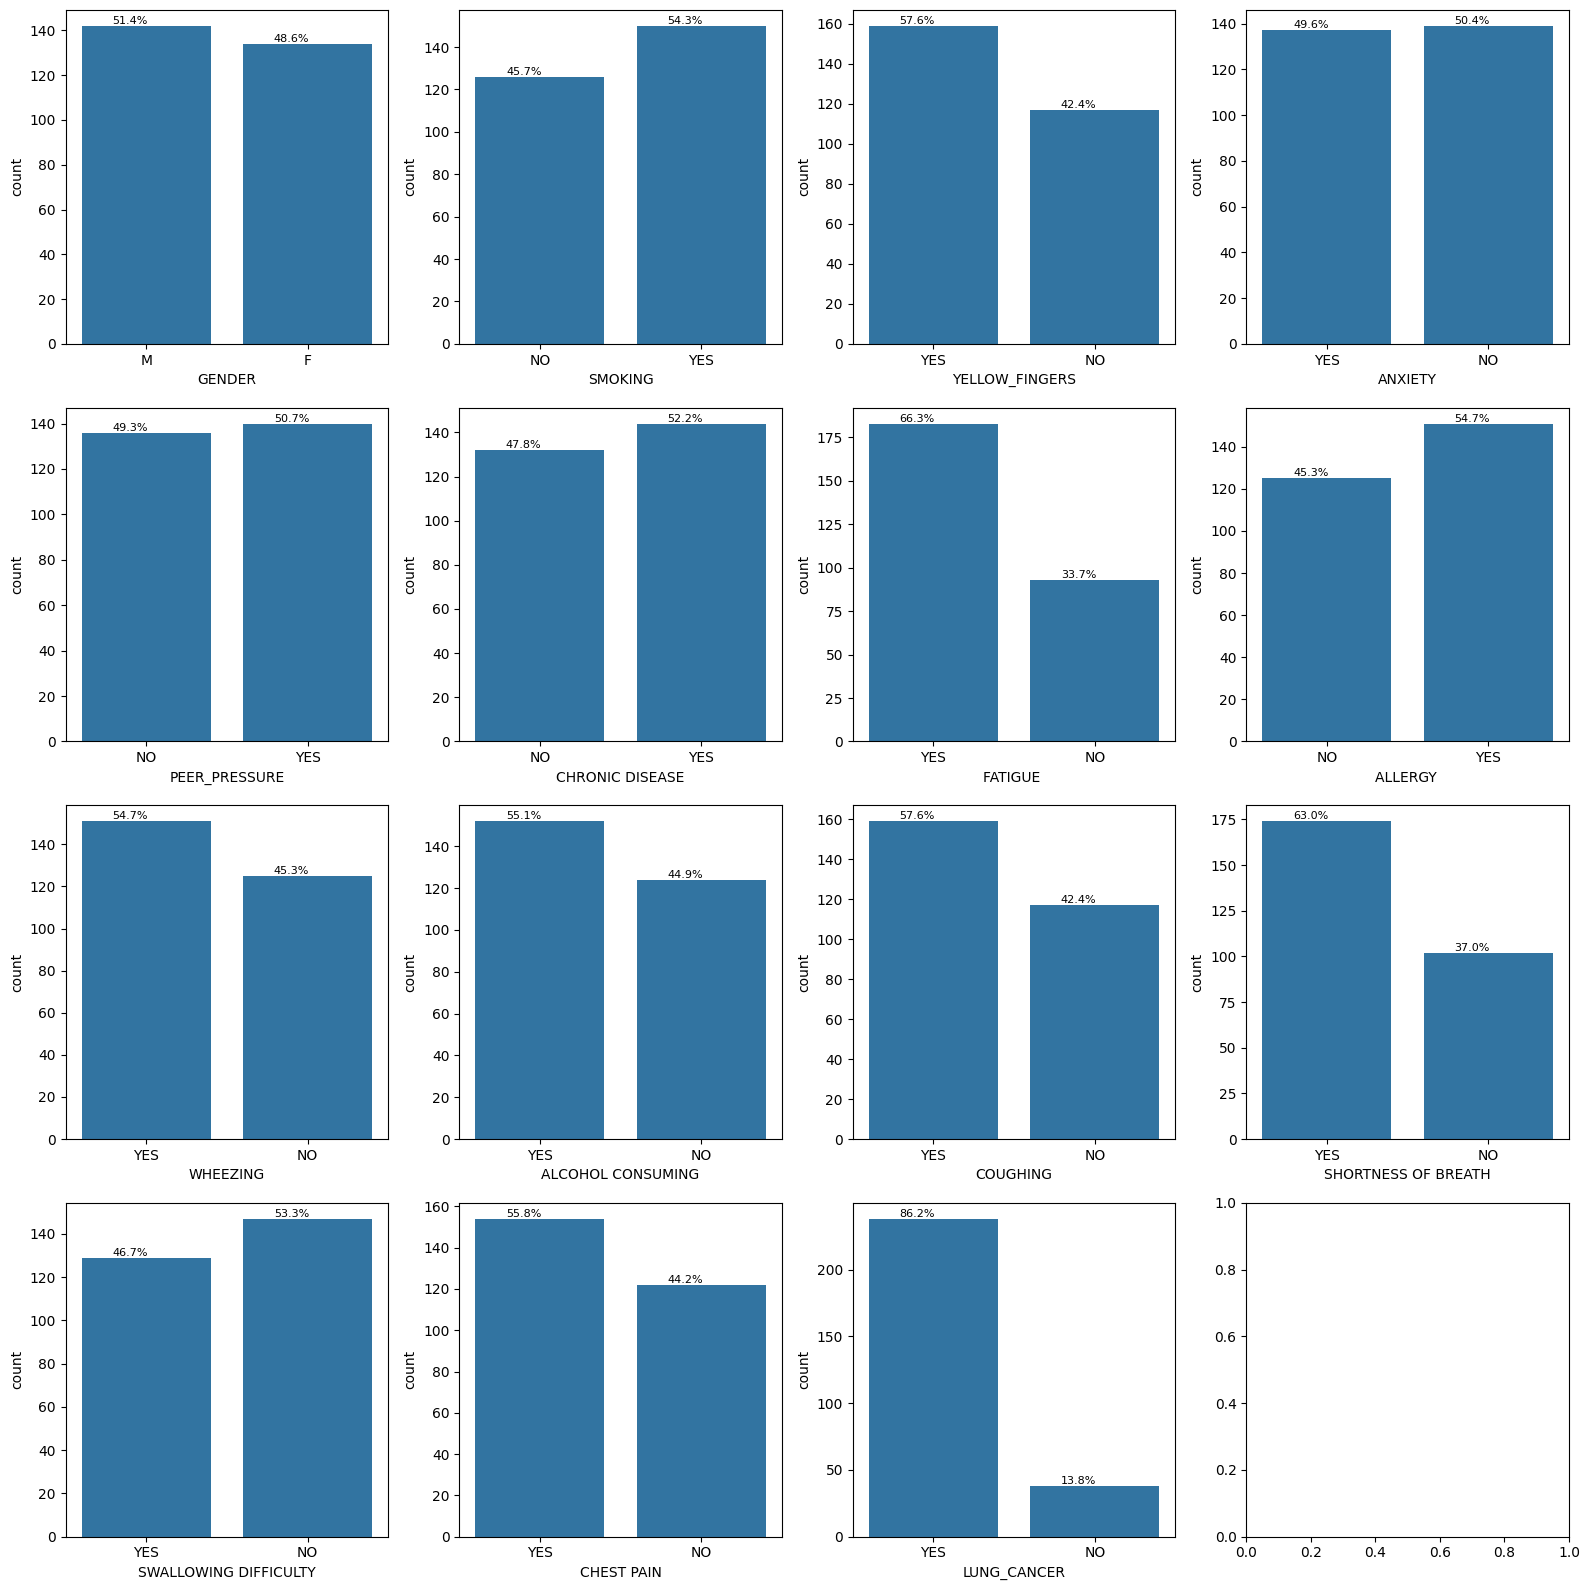

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis of categorical features with percentages

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# List of categorical features
categorical_features = ['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                         'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
                         'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

# Loop through each feature and create countplot with percentages
for feature, ax in zip(categorical_features, axes.flatten()):
    # Plot countplot
    sns.countplot(data=df, x=feature, ax=ax)
    
    # Calculate and display percentages on top of each bar
    total = len(df[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height()
        ax.annotate(percentage, (x
                                 , y), ha='center', va='bottom', fontsize=8)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


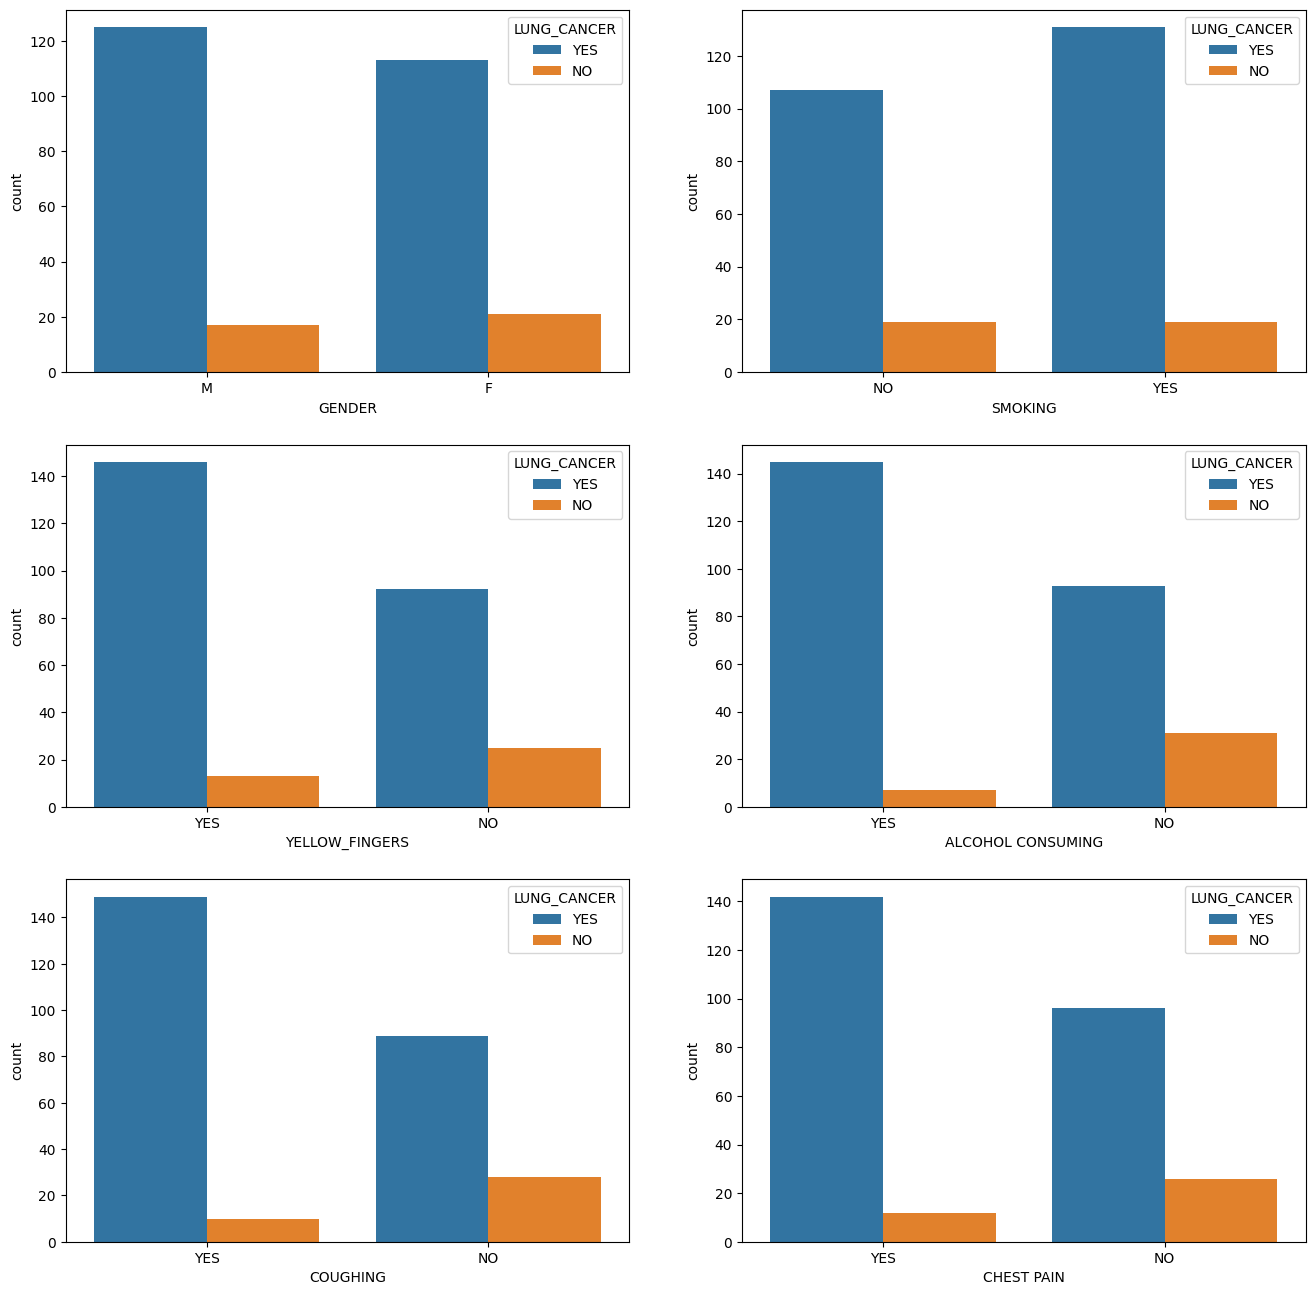

In [29]:
# Bivariate analysis

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

# Countplot for gender,hypertension, heart_disease,ever_married,
   #work_type, Residence_type,smoking_status,stroke
    
sns.countplot(ax=axes[0,0], data=df, x="GENDER", hue= "LUNG_CANCER")
sns.countplot(ax=axes[0,1], data=df, x="SMOKING", hue= "LUNG_CANCER")
sns.countplot(ax=axes[1,0], data=df, x="YELLOW_FINGERS", hue= "LUNG_CANCER")
sns.countplot(ax=axes[1,1], data=df, x="ALCOHOL CONSUMING", hue= "LUNG_CANCER")
sns.countplot(ax=axes[2,0], data=df, x="COUGHING", hue= "LUNG_CANCER")
sns.countplot(ax=axes[2,1], data=df, x="CHEST PAIN", hue= "LUNG_CANCER")

# Show the plot
plt.show()

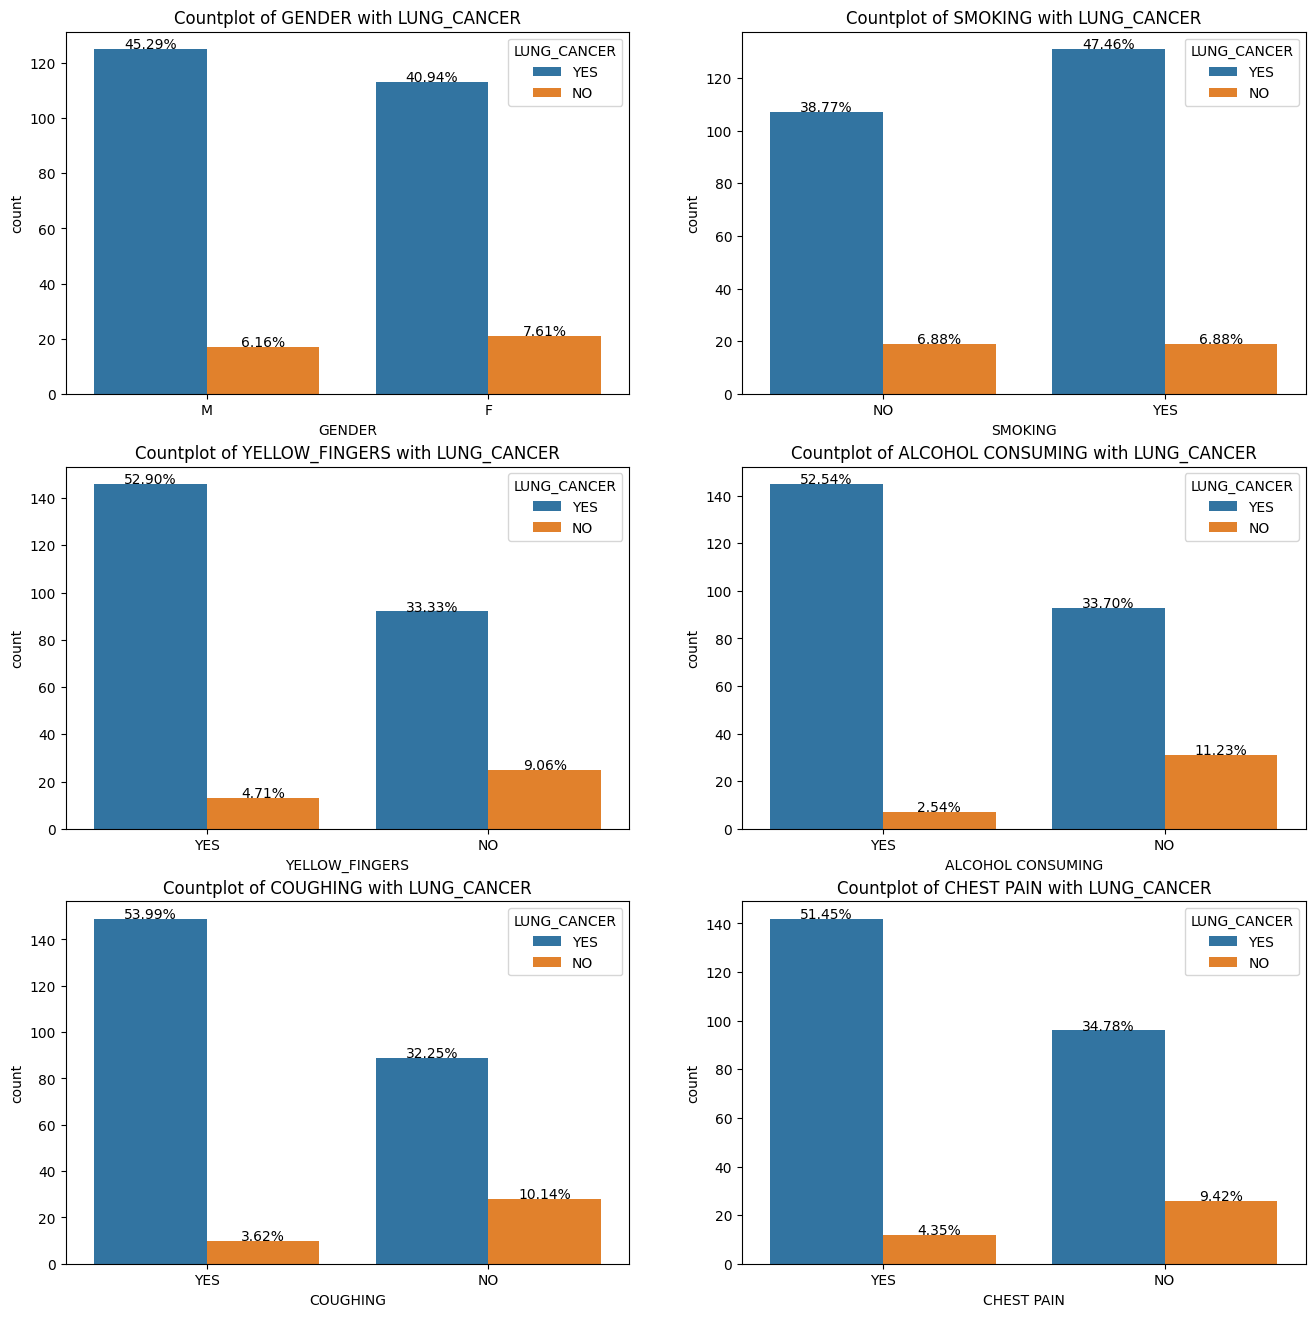

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate analysis with percentages

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

# Countplot for GENDER, SMOKING, YELLOW_FINGERS, ALCOHOL CONSUMING, COUGHING, CHEST PAIN with LUNG_CANCER
sns.countplot(ax=axes[0, 0], data=df, x="GENDER", hue="LUNG_CANCER")
axes[0, 0].set_title('Countplot of GENDER with LUNG_CANCER')
total = float(len(df))  # total number of instances
for p in axes[0, 0].patches:
    height = p.get_height()
    if height > 0:
        axes[0, 0].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.2%}'.format(height / total),
                       ha="center")

sns.countplot(ax=axes[0, 1], data=df, x="SMOKING", hue="LUNG_CANCER")
axes[0, 1].set_title('Countplot of SMOKING with LUNG_CANCER')
total = float(len(df))
for p in axes[0, 1].patches:
    height = p.get_height()
    if height > 0:
        axes[0, 1].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.2%}'.format(height / total),
                       ha="center")

sns.countplot(ax=axes[1, 0], data=df, x="YELLOW_FINGERS", hue="LUNG_CANCER")
axes[1, 0].set_title('Countplot of YELLOW_FINGERS with LUNG_CANCER')
total = float(len(df))
for p in axes[1, 0].patches:
    height = p.get_height()
    if height > 0:
        axes[1, 0].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.2%}'.format(height / total),
                       ha="center")

sns.countplot(ax=axes[1, 1], data=df, x="ALCOHOL CONSUMING", hue="LUNG_CANCER")
axes[1, 1].set_title('Countplot of ALCOHOL CONSUMING with LUNG_CANCER')
total = float(len(df))
for p in axes[1, 1].patches:
    height = p.get_height()
    if height > 0:
        axes[1, 1].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.2%}'.format(height / total),
                       ha="center")

sns.countplot(ax=axes[2, 0], data=df, x="COUGHING", hue="LUNG_CANCER")
axes[2, 0].set_title('Countplot of COUGHING with LUNG_CANCER')
total = float(len(df))
for p in axes[2, 0].patches:
    height = p.get_height()
    if height > 0:
        axes[2, 0].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.2%}'.format(height / total),
                       ha="center")

sns.countplot(ax=axes[2, 1], data=df, x="CHEST PAIN", hue="LUNG_CANCER")
axes[2, 1].set_title('Countplot of CHEST PAIN with LUNG_CANCER')
total = float(len(df))
for p in axes[2, 1].patches:
    height = p.get_height()
    if height > 0:
        axes[2, 1].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.2%}'.format(height / total),
                       ha="center")

# Show the plot
plt.show()


### Exploratory Data Analysis (EDA) Report

#### Dataset Overview:

The dataset reveals a high prevalence of lung cancer, with 86.2% of individuals exhibiting this condition. The gender distribution in the dataset is nearly balanced, with 51.4% males and 48.6% females. The age of individuals ranges from 21 to 87 years, with a mean age of 62.9.

#### Prevalence of some symptoms:

- Chest Pain: 55.8%
- Yellow Fingers: 57.6%
- Fatigue: 66.3%
- Coughing: 57.6%

#### Gender Disparities in Lung Cancer:

The prevalence of lung cancer varies between genders, with 52.90% of males affected compared to 33.33% of females. This suggests a notable gender-based difference in the occurrence of lung cancer within the dataset.

#### Correlation Analysis:

1. **Age and Lung Cancer (Correlation: 0.223):**
   - A positive correlation exists between age and the likelihood of lung cancer, indicating that as age increases, there is a moderate increase in the probability of developing lung cancer.

2. **Alcohol Consuming and Lung Cancer (Correlation: 0.278):**
   - Individuals who consume alcohol show a positive correlation with the occurrence of lung cancer. The correlation suggests that alcohol consumption may be associated with a slightly higher likelihood of developing lung cancer.

3. **Smoking and Lung Cancer (Correlation: 1.000):**
   - A perfect positive correlation exists between smoking and lung cancer, reinforcing the well-established understanding that smoking is a significant risk factor for lung cancer.

4. **Gender and Lung Cancer (Correlation: 0.000):**
   - The correlation coefficient of 0 indicates no significant association between gender and the occurrence of lung cancer in this dataset. Gender does not appear to be a determining factor in lung cancer prevalence.

#### Conclusion:

The EDA provides valuable insights into the dataset, emphasizing the prevalence of lung cancer and revealing correlations with age, alcohol consumption, smoking, and gender. These findings lay the groundwork for further analyses and emphasize the importance of considering various factors in understanding lung cancer patterns.

# 3. Feature Engineering

In [3]:
### Re-import initial dataset

#Importing the dataset
data = pd.read_csv("data.csv")

# Drop duplicates

data.drop_duplicates(inplace= True)

#shape
data.shape

(276, 16)

In [4]:
# Encode categorical features
import pandas as pd

data_encoded= pd.get_dummies(data, columns=['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE','FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING','SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN','LUNG_CANCER'], drop_first=True)


In [5]:
data_encoded.head()

,AGE,GENDER_M,SMOKING_2,YELLOW_FINGERS_2,ANXIETY_2,PEER_PRESSURE_2,CHRONIC DISEASE_2,FATIGUE _2,ALLERGY _2,WHEEZING_2,ALCOHOL CONSUMING_2,COUGHING_2,SHORTNESS OF BREATH_2,SWALLOWING DIFFICULTY_2,CHEST PAIN_2,LUNG_CANCER_YES
0,69,True,False,True,True,False,False,True,False,True,True,True,True,True,True,True
1,74,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True
2,59,False,False,False,False,True,False,True,False,True,False,True,True,False,True,False
3,63,True,True,True,True,False,False,False,False,False,True,False,False,True,True,False
4,63,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False


In [6]:
# Split dataset into train, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temporary, Y_train, Y_temporary = train_test_split(data_encoded.drop('LUNG_CANCER_YES', axis=1), 
                                                              data_encoded['LUNG_CANCER_YES'], test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temporary, Y_temporary, test_size=0.5, random_state=42)


In [7]:
# Scaling / Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


# 4. Predictions (Classification Techniques)

 #### 4.a. Predictions

In [8]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lor_model= LogisticRegression(random_state=42)
lor_model.fit(X_train, Y_train)
lor_pred= lor_model.predict(X_valid)


#Support vector machine
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_valid)


#Decision tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_valid)


#Random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_valid)


# XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_pred = xgb_model.predict(X_valid)

 #### 4.b. Evaluation

In [9]:
# importing libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [10]:
# Evaluate models
models = [lor_model, svm_model, rf_model, dt_model, xgb_model]
model_names = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Decision Tree','XGBoost']

for model, name in zip(models, model_names):
    Y_pred = model.predict(X_test)
    
    print(f"\nMetrics for {name}:")
    print("Accuracy:", accuracy_score(Y_test, Y_pred))
    print("Precision:", precision_score(Y_test, Y_pred))
    print("Recall:", recall_score(Y_test, Y_pred))
    print("F1 Score:", f1_score(Y_test, Y_pred))
    print("Jaccard Score:", jaccard_score(Y_test, Y_pred))


Metrics for Logistic Regression:
Accuracy: 0.8571428571428571
Precision: 0.8461538461538461
Recall: 1.0
F1 Score: 0.9166666666666666
Jaccard Score: 0.8461538461538461

Metrics for Support Vector Machine:
Accuracy: 0.8333333333333334
Precision: 0.825
Recall: 1.0
F1 Score: 0.9041095890410958
Jaccard Score: 0.825

Metrics for Random Forest:
Accuracy: 0.8571428571428571
Precision: 0.8461538461538461
Recall: 1.0
F1 Score: 0.9166666666666666
Jaccard Score: 0.8461538461538461

Metrics for Decision Tree:
Accuracy: 0.8809523809523809
Precision: 0.868421052631579
Recall: 1.0
F1 Score: 0.9295774647887324
Jaccard Score: 0.868421052631579

Metrics for XGBoost:
Accuracy: 0.9047619047619048
Precision: 0.8918918918918919
Recall: 1.0
F1 Score: 0.9428571428571428
Jaccard Score: 0.8918918918918919


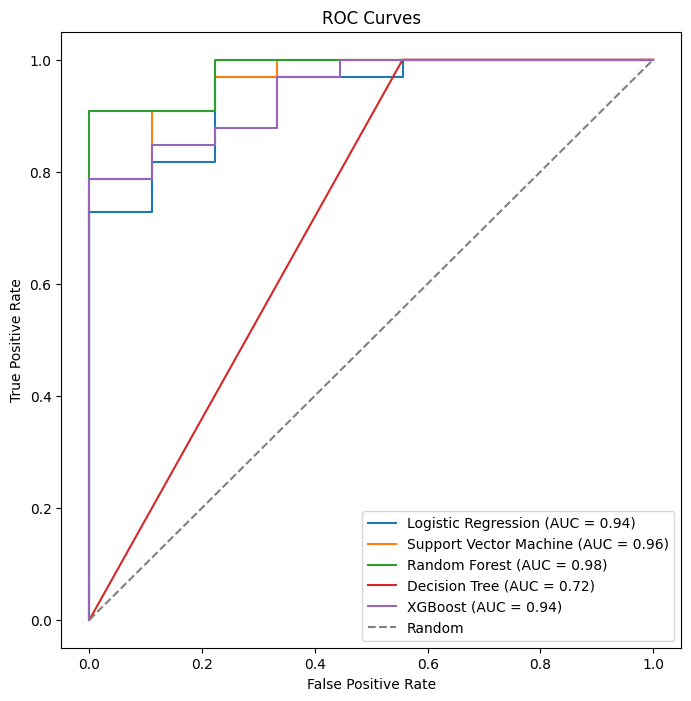

In [11]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, Y_test, label):
    Y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(8, 8))
plot_roc_curve(lor_model, X_test, Y_test, 'Logistic Regression')
plot_roc_curve(svm_model, X_test, Y_test, 'Support Vector Machine')
plot_roc_curve(rf_model, X_test, Y_test, 'Random Forest')
plot_roc_curve(dt_model, X_test, Y_test, 'Decision Tree')
plot_roc_curve(xgb_model, X_test, Y_test, 'XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

## Insights from classification algorithms performance evaluation:

**Interpretation:**
- All models exhibit high accuracy, precision, recall, F1 score, and Jaccard score, indicating good overall performance.
- Random Forest has the highest AUC (98%), followed closely by XGBoost (94%).
- Decision Tree has a lower AUC (72%), suggesting it might not perform as well in distinguishing between classes.
- SVM, Logistic Regression, and XGBoost have high AUC values, indicating strong discrimination capabilities.
- In practice, the choice between these models may depend on factors such as interpretability, computational efficiency, and the specific goals of the application.

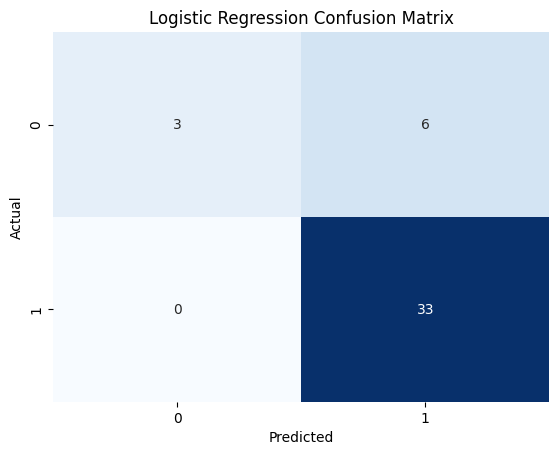

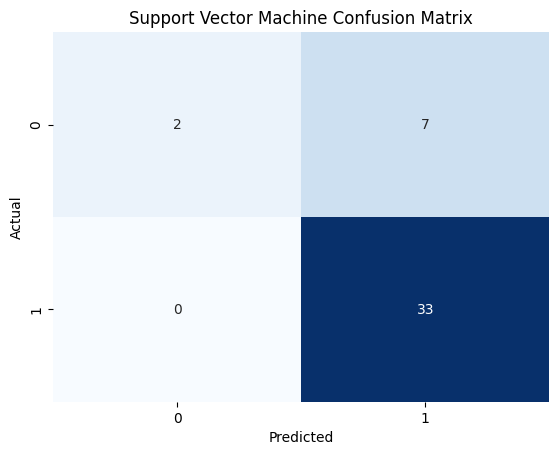

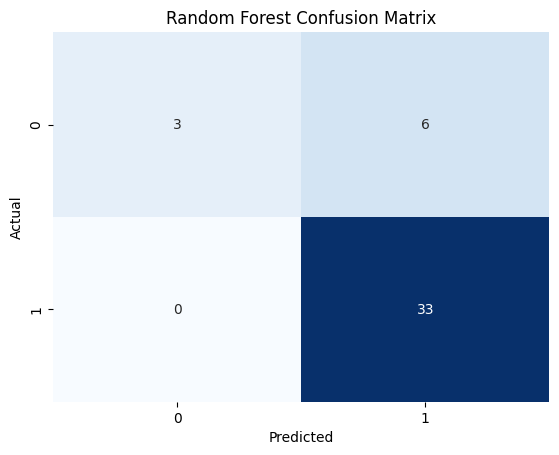

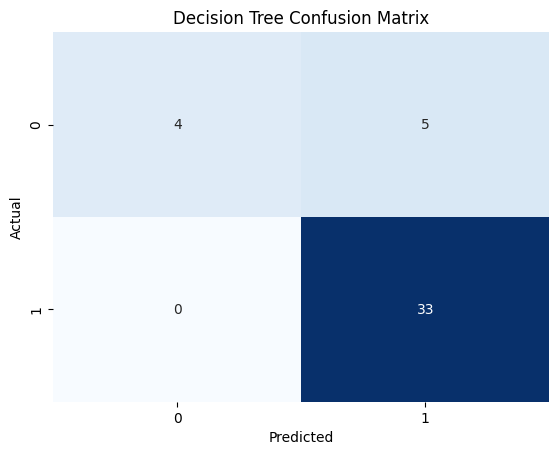

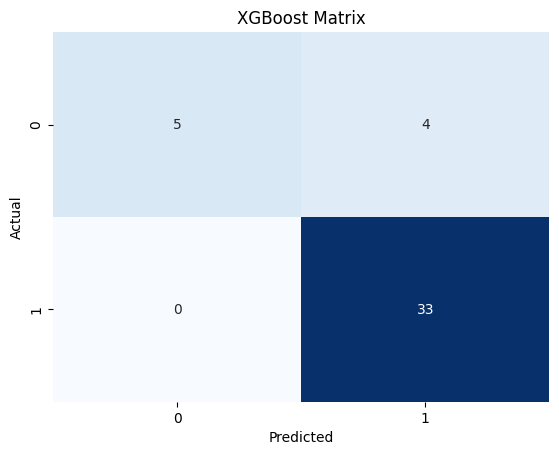

In [12]:

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, Y_test, title):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(lor_model, X_test, Y_test, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(svm_model, X_test, Y_test, 'Support Vector Machine Confusion Matrix')
plot_confusion_matrix(rf_model, X_test, Y_test, 'Random Forest Confusion Matrix')
plot_confusion_matrix(dt_model, X_test, Y_test, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(xgb_model, X_test, Y_test, 'XGBoost Matrix')
